# Implementing linear regression using TensorFlow
Author: Jiajia Sun at University of Houston, 04/04/2019

## 1. Generate synthetic data

Suppose we have some values, y_data, (for example, life satisfaction values for a number of countries), we want to explain the data using some feature vectors x_data (e.g., GDP per capita, life expectancy, air quality). To do so, we assume a linear model, y_data = x_data\*weights + bias. We would like to use machine learning to learn a model that can explain life satisfaction using the three features. Speficially, we would like a machine learning algorithm to figure out the optimal values for weights and bias.

In [40]:
import numpy as np
x_data = np.random.randn(2000,3)
w_real = np.array([[0.3],[0.5],[0.1]])

In [41]:
b_real = -0.2

In [42]:
noise = np.random.randn(2000,1)*0.1

In [43]:
y_data = np.matmul(x_data,w_real) + b_real + noise

In [44]:
y_data.shape

(2000, 1)

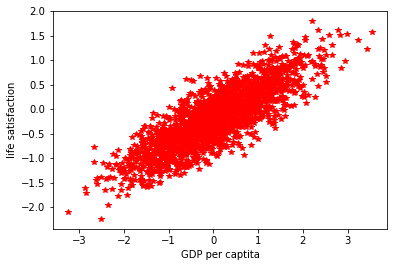

In [45]:
import matplotlib.pyplot as plt
plt.plot(x_data[:,1],y_data,'r*')
plt.xlabel("GDP per captita")
plt.ylabel("life satisfaction")
#plt.axis([-5, 5, -3, 3])
plt.show()

## 2. Create a computation graph

In [46]:
import tensorflow as tf

In [47]:
num_iterations = 10

In [48]:
cost_val = []

In [49]:
x = tf.placeholder(tf.float32,shape=[None,3])
y_true = tf.placeholder(tf.float32,shape=[None,1])

In [50]:
w = tf.Variable([[0.2],[2.0],[9.0]],tf.float32, name='weights')
b = tf.Variable([2.4],tf.float32, name='bias')
y_pred = tf.matmul(x,w) + b

We also need to define cost function. In this case, we can simply use the MSE (mean squared error) as the cost function.
tf.reduce_mean calculates the mean of elements across dimensions of a tensor.

In [51]:
cost = tf.reduce_mean(tf.square(y_true-y_pred))

Now, we need to define optimizer.

In [52]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)  # create an optimizer
train = optimizer.minimize(cost)  # create a train operation in the computatio graph

## 3. Execute the graph

In [53]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for iter in np.arange(num_iterations):
        sess.run(train,feed_dict={x:x_data, y_true:y_data})
        cost_val.append(sess.run(cost,{x:x_data, y_true:y_data}))
        print(iter, sess.run([tf.transpose(w),b]))

0 [array([[0.7313892 , 0.6750994 , 0.15033531]], dtype=float32), array([-0.41288376], dtype=float32)]
1 [array([[0.27865276, 0.50458294, 0.12691712]], dtype=float32), array([-0.20021379], dtype=float32)]
2 [array([[0.30097398, 0.5034277 , 0.09657858]], dtype=float32), array([-0.19948329], dtype=float32)]
3 [array([[0.29864925, 0.5022204 , 0.09737139]], dtype=float32), array([-0.19863336], dtype=float32)]
4 [array([[0.2988099 , 0.5022447 , 0.09721787]], dtype=float32), array([-0.19863646], dtype=float32)]
5 [array([[0.29879564, 0.5022383 , 0.09722509]], dtype=float32), array([-0.19863255], dtype=float32)]
6 [array([[0.29879668, 0.5022385 , 0.09722422]], dtype=float32), array([-0.19863266], dtype=float32)]
7 [array([[0.29879662, 0.50223845, 0.09722427]], dtype=float32), array([-0.19863264], dtype=float32)]
8 [array([[0.29879662, 0.5022385 , 0.09722427]], dtype=float32), array([-0.19863263], dtype=float32)]
9 [array([[0.29879662, 0.50223845, 0.09722427]], dtype=float32), array([-0.1986326

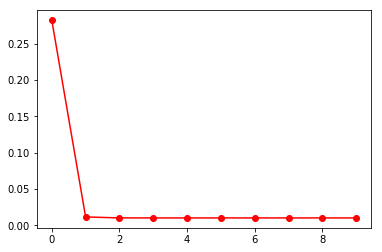

In [54]:
import matplotlib.pyplot as plt
plt.plot(np.arange(num_iterations),cost_val,'-ro')
plt.show()

In [55]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [39]:
show_graph(tf.get_default_graph()) # graph not display properly in IE. Use Chrome instead.